In [3]:
import torch
from torch import nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Tensor和numpy类型数据互换

## Tensor变Numpy
利用from_numpy()函数

In [54]:
import torch
import numpy as np
a=np.arange(10).reshape(2,5)
b=torch.from_numpy(a)
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


## Numpy转换为Tensor
利用.numpy()函数

In [55]:
import torch
import numpy as np
a=torch.arange(10).view(2,5)
b=a.numpy()
print(type(a))
print(type(b))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [37]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
y = y.reshape(y.shape[0],1)    # 注意这里要对y进行reshape，要不然就是1维的100向量。
n_samples, n_features = X.shape

In [5]:
n_features

1

In [6]:
n_samples

100

In [7]:
# model
input_size = n_features
output_size = 1
model = nn.Linear(in_features=input_size, out_features=output_size)

In [41]:
# loss and optimizer
learning_rate = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [49]:
# epoch and train
epoch = 100
for i in range(epoch):
    output = model(X)
    loss = loss_fn(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 10 == 0:
        print(f'---第{i+1}次训练的Loss为{loss.item()}---')


---第10次训练的Loss为1663.4315185546875---
---第20次训练的Loss为1621.9814453125---
---第30次训练的Loss为1581.831298828125---
---第40次训练的Loss为1542.9393310546875---
---第50次训练的Loss为1505.266357421875---
---第60次训练的Loss为1468.7740478515625---
---第70次训练的Loss为1433.424072265625---
---第80次训练的Loss为1399.1815185546875---
---第90次训练的Loss为1366.0107421875---
---第100次训练的Loss为1333.878173828125---


tensor([[ -23.8980],
        [  -6.9274],
        [  27.6281],
        [  40.4358],
        [  75.9240],
        [  22.4320],
        [  28.7713],
        [ -26.6839],
        [ -60.6475],
        [  19.5319],
        [ -25.0799],
        [ -13.8294],
        [ -46.7915],
        [  46.9379],
        [ -46.7574],
        [  43.5249],
        [   1.2116],
        [ -11.7452],
        [ -26.6566],
        [ -45.4966],
        [  -9.5889],
        [ 107.1015],
        [  45.2779],
        [  14.0371],
        [ -13.2347],
        [ -27.2684],
        [   7.1300],
        [  32.0440],
        [  63.4227],
        [ -30.5779],
        [ -11.6091],
        [ -36.8171],
        [  13.4874],
        [  45.7818],
        [  44.0404],
        [ -18.8736],
        [ -11.3521],
        [  84.0086],
        [-103.0308],
        [  48.3543],
        [ 103.1060],
        [  73.2214],
        [ -34.8305],
        [ -36.3596],
        [ -10.3482],
        [  46.2020],
        [  12.2452],
        [  57

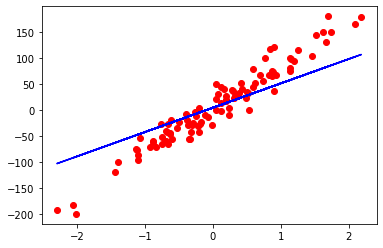

In [56]:
# Plot
predicted1 = model(X)
predicted2 = model(X).detach()
predicted3 = model(X).detach().numpy()
print(predicted1)   # 带grad的Tensor类型
print(predicted2)   # 不带grad的Tensor类型
print(predicted3)   # numpy类型
plt.plot(X, y, 'ro')
plt.plot(X, predicted3, 'b')
plt.show()